In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:\\Users\\aksha\\WCPSS_Data_Analysis\\data\\Wake_County_Public_Schools.csv')
df.head(10)

,X,Y,OBJECTID,TAG,NAME,GRADELEVEL,PHONE,CALENDAR,ADDRESSNUM,ADDRESS,CITY,ZIPCODE,MAGNETPROGRAM,WEBSITE,DISTRICT,TYPE
0,2.079034e+06,726189.156738,1,568,Swift Creek Elementary,Elementary,919-233-4320,Traditional,5601,Tryon Rd,Raleigh,27606,NaN,http://www.wcpss.net/swiftcreekes,5,Elementary Schools
1,2.063090e+06,734826.331720,2,340,Briarcliff Elementary,Elementary,919-460-3443,Traditional,1220,Pond St,Cary,27511,NaN,http://www.wcpss.net/briarcliffes,9,Elementary Schools
2,2.066876e+06,730870.613582,3,414,Farmington Woods Elementary,Elementary,919-460-3469,Traditional,1413,Hampton Valley Rd,Cary,27511,International Baccalaureate Programme,http://www.wcpss.net/farmingtonwoodses,9,Magnet Elementary School
3,2.069264e+06,736058.347301,4,368,Cary High,High,919-460-3549,Traditional,638,Walnut St,Cary,27511,NaN,http://www.wcpss.net/caryhs,9,High School
4,2.070549e+06,737890.926641,5,304,Adams Elementary,Elementary,919-460-3431,Year-Round,805,Cary Towne Blvd,Cary,27511,NaN,http://www.wcpss.net/adamses,9,Elementary Schools
5,2.042533e+06,717373.978174,6,308,Apex Elementary,Elementary,919-387-2150,Traditional,700,Tingen Rd,Apex,27502,NaN,http://www.wcpss.net/apexes,8,Elementary Schools
6,2.048186e+06,726157.985868,7,316,Apex High,High,919-387-2208,Traditional,1501,Laura Duncan Rd,Apex,27502,NaN,http://www.wcpss.net/apexhs,8,High School
7,2.065777e+06,743672.857663,8,460,Kingswood Elementary,Elementary,919-460-3481,Traditional,200,E Johnson St,Cary,27513,Montessori Program grades PK-5,http://www.wcpss.net/kingswoodes,9,Magnet Elementary School
8,2.062330e+06,744446.473241,9,520,Northwoods Elementary,Elementary,919-460-3491,Traditional,8850,Chapel Hill Rd,Cary,27513,NaN,http://www.wcpss.net/northwoodses,9,Elementary Schools
9,2.088523e+06,737156.967807,10,376,Combs Elementary,Elementary,919-233-4300,Traditional,2001,Lorimer Rd,Raleigh,27606,Leadership,http://www.wcpss.net/combses,5,Magnet Elementary School


In [161]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'TAG', 'NAME', 'GRADELEVEL', 'PHONE', 'CALENDAR',
       'ADDRESSNUM', 'ADDRESS', 'CITY', 'ZIPCODE', 'MAGNETPROGRAM', 'WEBSITE',
       'DISTRICT', 'TYPE'],
      dtype='object')

In [162]:
df=df.drop(columns=['X','Y','OBJECTID','TAG','PHONE','ADDRESSNUM','ADDRESS','ZIPCODE','DISTRICT','WEBSITE'])

In [163]:
df=df.drop(columns='MAGNETPROGRAM')

In [164]:
df= df[df['GRADELEVEL']=='Elementary']
df.head(10)

,NAME,GRADELEVEL,CALENDAR,CITY,TYPE
0,Swift Creek Elementary,Elementary,Traditional,Raleigh,Elementary Schools
1,Briarcliff Elementary,Elementary,Traditional,Cary,Elementary Schools
2,Farmington Woods Elementary,Elementary,Traditional,Cary,Magnet Elementary School
4,Adams Elementary,Elementary,Year-Round,Cary,Elementary Schools
5,Apex Elementary,Elementary,Traditional,Apex,Elementary Schools
7,Kingswood Elementary,Elementary,Traditional,Cary,Magnet Elementary School
8,Northwoods Elementary,Elementary,Traditional,Cary,Elementary Schools
9,Combs Elementary,Elementary,Traditional,Raleigh,Magnet Elementary School
12,Powell Elementary,Elementary,Traditional,Raleigh,Magnet Elementary School
15,Washington Elementary,Elementary,Traditional,Raleigh,Magnet Elementary School


In [165]:
df= df.drop(columns='GRADELEVEL')

In [166]:
df['Magnet_status']= df['TYPE'].apply(lambda x:'Y' if 'Magnet' in x else 'N')

In [167]:
df.head(10)

,NAME,CALENDAR,CITY,TYPE,Magnet_status
0,Swift Creek Elementary,Traditional,Raleigh,Elementary Schools,N
1,Briarcliff Elementary,Traditional,Cary,Elementary Schools,N
2,Farmington Woods Elementary,Traditional,Cary,Magnet Elementary School,Y
4,Adams Elementary,Year-Round,Cary,Elementary Schools,N
5,Apex Elementary,Traditional,Apex,Elementary Schools,N
7,Kingswood Elementary,Traditional,Cary,Magnet Elementary School,Y
8,Northwoods Elementary,Traditional,Cary,Elementary Schools,N
9,Combs Elementary,Traditional,Raleigh,Magnet Elementary School,Y
12,Powell Elementary,Traditional,Raleigh,Magnet Elementary School,Y
15,Washington Elementary,Traditional,Raleigh,Magnet Elementary School,Y


In [168]:
df = df.drop(columns='TYPE')

In [169]:
df['CALENDAR'].unique()

array(['Traditional', 'Year-Round', 'Year-Round, Track 4 Only',
       'Modified', 'TBD'], dtype=object)

In [170]:
TBD = df.groupby(['CALENDAR']).agg('count')

In [171]:
print(TBD)

                          NAME  CITY  Magnet_status
CALENDAR                                           
Modified                     3     3              3
TBD                          8     8              8
Traditional                 76    76             76
Year-Round                  28    28             28
Year-Round, Track 4 Only     9     9              9


In [172]:
df= df.drop(df[df['CALENDAR'].isin(['TBD','Modified'])].index)

In [173]:
df['CALENDAR'].value_counts()

CALENDAR
Traditional                 76
Year-Round                  28
Year-Round, Track 4 Only     9
Name: count, dtype: int64

In [174]:
df['CALENDAR']= df['CALENDAR'].apply(lambda x: 'Year-Round' if x == 'Year-Round, Track 4 Only' else x)


In [175]:
df['CALENDAR'].value_counts()

CALENDAR
Traditional    76
Year-Round     37
Name: count, dtype: int64

In [217]:
df_results= pd.read_excel("C:\\Users\\aksha\\WCPSS_Data_Analysis\\data\\2023-24 School Assessment and Other Indicator Data.xlsx",sheet_name='Assess-Ind Data Set')

In [218]:
df_results.head()

,reporting_year,lea_code,lea_name,school_code,school_name,sbe_region,grade_span,title_1,subgroup,subject,den,total_pct,notprof_pct,lev3_pct,lev4_pct,lev5_pct,glp_pct,ccr_pct
0,2024,NC,State of North Carolina,NC,State of North Carolina,NaN,NaN,NaN,AIG,ACT,18739,86.8,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,NC,State of North Carolina,NC,State of North Carolina,NaN,NaN,NaN,ALL,ACT,105716,40.2,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,NC,State of North Carolina,NC,State of North Carolina,NaN,NaN,NaN,AMIN,ACT,980,19.6,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,NC,State of North Carolina,NC,State of North Carolina,NaN,NaN,NaN,ASIA,ACT,4316,72.4,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,NC,State of North Carolina,NC,State of North Carolina,NaN,NaN,NaN,BLCK,ACT,24022,18.3,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
df_results.columns

Index(['reporting_year', 'lea_code', 'lea_name', 'school_code', 'school_name',
       'sbe_region', 'grade_span', 'title_1', 'subgroup', 'subject', 'den',
       'total_pct', 'notprof_pct', 'lev3_pct', 'lev4_pct', 'lev5_pct',
       'glp_pct', 'ccr_pct'],
      dtype='object')

In [220]:
df_results = df_results.drop(columns=['reporting_year', 'lea_code', 'lea_name', 'school_code','sbe_region','title_1','den',
       'total_pct', 'notprof_pct', 'lev3_pct', 'lev4_pct', 'lev5_pct'])

In [221]:
df_results.head(10)

,school_name,grade_span,subgroup,subject,glp_pct,ccr_pct
0,State of North Carolina,NaN,AIG,ACT,NaN,NaN
1,State of North Carolina,NaN,ALL,ACT,NaN,NaN
2,State of North Carolina,NaN,AMIN,ACT,NaN,NaN
3,State of North Carolina,NaN,ASIA,ACT,NaN,NaN
4,State of North Carolina,NaN,BLCK,ACT,NaN,NaN
5,State of North Carolina,NaN,EDS,ACT,NaN,NaN
6,State of North Carolina,NaN,ELS,ACT,NaN,NaN
7,State of North Carolina,NaN,FCS,ACT,NaN,NaN
8,State of North Carolina,NaN,FEM,ACT,NaN,NaN
9,State of North Carolina,NaN,HISP,ACT,NaN,NaN


In [222]:
df_results= df_results[df_results['subgroup']=='ALL']

In [223]:
df_results['grade_span'].value_counts()

grade_span
PK-05    14101
06-08     8294
09-12     7947
0K-05     5170
0K-12     3585
0K-08     2996
PK-08     1756
09-13     1665
06-12     1486
PK-12      713
05-08      535
PK-06      510
03-05      498
PK-04      437
0K-06      413
07-08      221
0K-10      194
0K-11      164
0K-04      137
05-12      134
07-12      128
04-05      123
04-12      111
PK-03      101
06-13       97
05-06       90
04-08       89
03-11       82
11-13       73
06-10       69
0K-07       66
0K-09       58
08-12       55
02-05       54
PK-02       54
01-05       54
06-11       51
11-12       43
01-12       41
07-13       32
02-12       29
03-08       27
10-12       25
03-12       23
02-04       23
09-10       21
02-03       20
06-09       20
04-06       15
0K-02       15
0K-03       14
10-13        7
09-09        6
09-11        5
PK-01        3
0K-01        3
01-02        3
Name: count, dtype: int64

In [224]:
df_results.tail()

,school_name,grade_span,subgroup,subject,glp_pct,ccr_pct
727009,Wilson Preparatory Academy,0K-12,ALL,RD08,50,18.8
727018,Wilson Preparatory Academy,0K-12,ALL,RDGS,59.6,28.9
727032,Wilson Preparatory Academy,0K-12,ALL,SC05,69.6,53.6
727042,Wilson Preparatory Academy,0K-12,ALL,SC08,71.9,54.7
727051,Wilson Preparatory Academy,0K-12,ALL,SCGS,70.8,54.2


In [225]:
df_results['subject'].unique()

array(['ACT', 'ACT4B', 'ACTALL', 'ACTEN', 'ACTMA', 'ACTRD', 'ACTSC',
       'AWA', 'BI', 'CGRE', 'CGRS', 'E2', 'ELP', 'ELPA', 'ELPX', 'EOC',
       'EOG', 'EOG03', 'EOG04', 'EOG05', 'EOG06', 'EOG07', 'EOG08', 'M1',
       'M1SEP', 'M3', 'M8SEP', 'MA03', 'MA04', 'MA05', 'MA06', 'MA07',
       'MA08', 'MAGS', 'MCR', 'PCALL', 'RD03', 'RD04', 'RD05', 'RD06',
       'RD07', 'RD08', 'RDGS', 'SC05', 'SC08', 'SCGS', 'WK'], dtype=object)

In [226]:
df_results = df_results[df_results['subject']=='EOG']

In [227]:
df_results['subject'].value_counts()

subject
EOG    2237
Name: count, dtype: int64

In [228]:
df_results['school_name'].value_counts()

school_name
Central Elementary             7
Union Elementary               5
Southwest Elementary           4
Bethel Elementary              4
New Hope Elementary            4
                              ..
Franklin Academy               1
Marvin B Smith Elementary      1
North Graham Elementary        1
East Wake Academy              1
Alamance-Burlington Schools    1
Name: count, Length: 2150, dtype: int64

In [229]:
df_results['school_type']= df_results['school_name'].apply(lambda x :'Elementary' if 'Elementary'in x else 'other' )

In [230]:
df_results = df_results[df_results['school_type']=='Elementary']

In [231]:
df_results['school_type'].value_counts()

school_type
Elementary    1191
Name: count, dtype: int64

In [232]:
df_results[df_results['school_name'].str.contains('Poe')]

,school_name,grade_span,subgroup,subject,glp_pct,ccr_pct,school_type
607408,Poe Elementary,PK-05,ALL,EOG,61.2,44.9,Elementary


In [233]:
df_results['school_name'].duplicated()

2052      False
2303      False
2806      False
3032      False
3534      False
          ...  
654230     True
654420    False
655033    False
655434    False
656038    False
Name: school_name, Length: 1191, dtype: bool

In [234]:
dups=df_results['school_name'].duplicated().sum()

In [235]:
print(dups)

77


In [236]:
df_results = df_results.drop_duplicates()

In [237]:
df_results['school_type'].value_counts()

school_type
Elementary    1191
Name: count, dtype: int64

In [238]:
df_results.sample(20)

,school_name,grade_span,subgroup,subject,glp_pct,ccr_pct,school_type
597585,Laurel Park Elementary,PK-05,ALL,EOG,79.3,62.9,Elementary
438797,Heritage Elementary School,0K-05,ALL,EOG,52.7,33.6,Elementary
229046,Woodhill Elementary,PK-05,ALL,EOG,27.3,13.2,Elementary
577961,Brentwood Elementary,PK-05,ALL,EOG,44.6,30.1,Elementary
508942,Williamsburg Elementary,PK-05,ALL,EOG,48.6,27.3,Elementary
566243,Wingate Elementary,PK-05,ALL,EOG,60.4,38.3,Elementary
247307,General Greene Elementary,0K-05,ALL,EOG,63.7,46,Elementary
255712,Ronald E. McNair Elementary,PK-05,ALL,EOG,41.9,22.6,Elementary
265437,Southwest Elementary,0K-05,ALL,EOG,81.6,66.1,Elementary
481091,Grays Chapel Elementary School,0K-05,ALL,EOG,53.2,37.4,Elementary


In [239]:
duplicates = df_results.duplicated().sum()
print(duplicates)

0


In [240]:
df_results.columns

Index(['school_name', 'grade_span', 'subgroup', 'subject', 'glp_pct',
       'ccr_pct', 'school_type'],
      dtype='object')

In [241]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 2052 to 656038
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  1191 non-null   object
 1   grade_span   1191 non-null   object
 2   subgroup     1191 non-null   object
 3   subject      1191 non-null   object
 4   glp_pct      1191 non-null   object
 5   ccr_pct      1191 non-null   object
 6   school_type  1191 non-null   object
dtypes: object(7)
memory usage: 74.4+ KB


In [242]:
df_results = df_results.drop(columns=['grade_span','subgroup','subject','school_type'])

In [243]:
df_results = df_results.rename({'school_name':'SCHOOL_NAME'})

In [244]:
df_results.columns

Index(['school_name', 'glp_pct', 'ccr_pct'], dtype='object')

In [245]:
df.columns

Index(['NAME', 'CALENDAR', 'CITY', 'Magnet_status'], dtype='object')

In [246]:
df_calendar = df.merge(df_results, left_on='NAME', right_on='school_name', how='inner')

In [247]:
df_calendar['NAME'].value_counts()

NAME
Washington Elementary           3
Northwoods Elementary           2
Brentwood Elementary            2
Salem Elementary                2
Oak Grove Elementary            2
                               ..
Beaverdam Elementary            1
Hortons Creek Elementary        1
Rogers Lane Elementary          1
Southeast Raleigh Elementary    1
Buckhorn Creek Elementary       1
Name: count, Length: 111, dtype: int64

In [248]:
df_calendar[df_calendar['NAME']=='Washington Elementary']

,NAME,CALENDAR,CITY,Magnet_status,school_name,glp_pct,ccr_pct
10,Washington Elementary,Traditional,Raleigh,Y,Washington Elementary,34.8,18.3
11,Washington Elementary,Traditional,Raleigh,Y,Washington Elementary,39.9,27.3
12,Washington Elementary,Traditional,Raleigh,Y,Washington Elementary,69.4,56.9


In [249]:
df_calendar = df_calendar.drop(columns=['school_name','ccr_pct'])

In [250]:
print(type(df_calendar['glp_pct']))

<class 'pandas.core.series.Series'>


In [251]:
df_calendar['glp_pct'].apply(type).value_counts()

glp_pct
<class 'float'>    113
<class 'int'>        9
<class 'str'>        1
Name: count, dtype: int64

In [255]:
df_calendar['glp_pct'] = pd.to_numeric(df_calendar['glp_pct'],errors='coerce')

In [253]:
df_calendar.head()

,NAME,CALENDAR,CITY,Magnet_status,glp_pct
0,Swift Creek Elementary,Traditional,Raleigh,N,65.7
1,Briarcliff Elementary,Traditional,Cary,N,63.6
2,Farmington Woods Elementary,Traditional,Cary,Y,77
3,Adams Elementary,Year-Round,Cary,N,59.8
4,Apex Elementary,Traditional,Apex,N,71.9


In [260]:
df_cal_type = df_calendar.groupby(['NAME','CALENDAR']).agg('max').reset_index()

In [261]:
df_cal_type.head()

,NAME,CALENDAR,CITY,Magnet_status,glp_pct
0,Abbotts Creek Elementary,Traditional,Raleigh,N,80.8
1,Adams Elementary,Year-Round,Cary,N,59.8
2,Alston Ridge Elementary,Year-Round,Cary,N,78.4
3,Apex Elementary,Traditional,Apex,N,71.9
4,Aversboro Elementary,Traditional,Garner,N,42.8


<Axes: xlabel='glp_pct', ylabel='CALENDAR'>

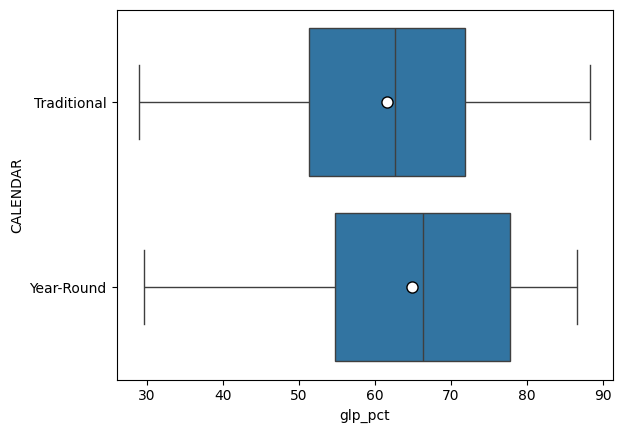

In [270]:
sns.boxplot(data=df_cal_type, x='glp_pct',y='CALENDAR',showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize":"8"},flierprops={"marker":"x", "markerfacecolor":"red", "markeredgecolor":"red"})


In [ ]:
df_cal_type[df_cal_type['CALENDAR']=='Traditional'].describe()

,glp_pct
count,75.000000
mean,61.581333
std,14.606956
min,29.000000
25%,51.400000
50%,62.700000
75%,71.900000
max,88.300000


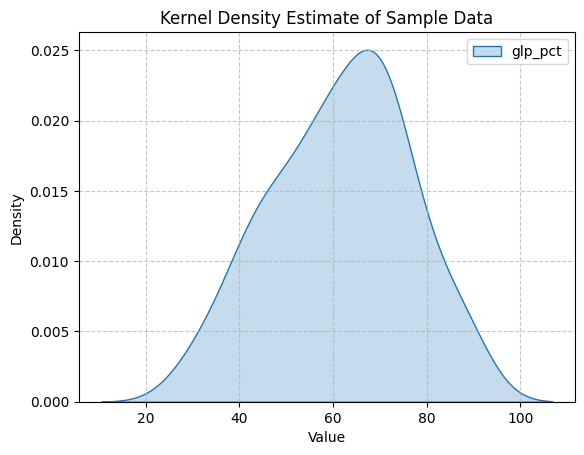

In [289]:
sns.kdeplot(df_cal_type[df_cal_type['CALENDAR']=='Traditional'], color='purple', fill=True)
plt.title('Kernel Density Estimate of Sample Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [277]:
df_cal_type[df_cal_type['CALENDAR']=='Year-Round'].describe()

,glp_pct
count,36.000000
mean,64.886111
std,14.671355
min,29.600000
25%,54.775000
50%,66.350000
75%,77.800000
max,86.600000


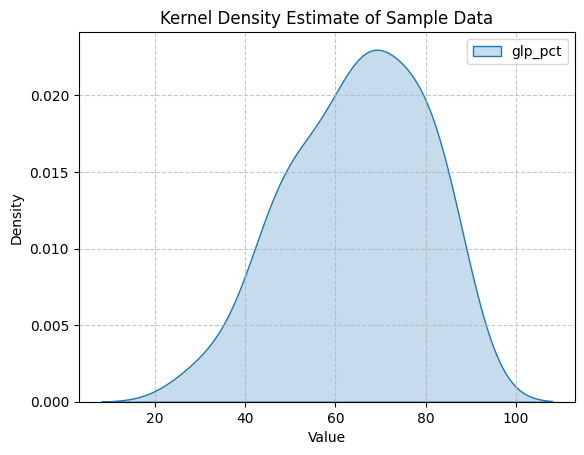

In [290]:
sns.kdeplot(df_cal_type[df_cal_type['CALENDAR']=='Year-Round'], color='purple', fill=True)
plt.title('Kernel Density Estimate of Sample Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [273]:
df_final = df_cal_type.groupby('CALENDAR')['glp_pct'].mean().reset_index()

In [263]:
df_final

CALENDAR
Traditional    61.581333
Year-Round     64.886111
Name: glp_pct, dtype: float64

In [285]:
df_traditional = df_cal_type[df_cal_type['CALENDAR']=='Traditional']
df_traditional = df_traditional.drop(columns=['NAME','CITY','Magnet_status'])

In [286]:
df_year_round= df_cal_type[df_cal_type['CALENDAR']=='Year-Round']
df_year_round = df_year_round.drop(columns=['NAME','CITY','Magnet_status'])

In [288]:
# run two independant variable t-test

from statsmodels.stats.weightstats import ttest_ind

ttest_ind(df_traditional['glp_pct'],df_year_round['glp_pct'],usevar='unequal')

(np.float64(-1.1125261096285983),
 np.float64(0.26978109371344144),
 np.float64(68.85641181800693))